In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [93]:
# Carrega dataset
gastos_diretos = pd.read_csv('../databases/gastosdiretos.csv', encoding='utf-8')

## Classificação

In [94]:
# Classificação do orçamento
def classificacao(orcamento):
    if orcamento < 2e7:
        return 'Baixo'  # Menor que 20 milhões
    elif 2e7 <= orcamento < 2e8:
        return 'Medio'  # De 20 a 200 milhões
    else:
        return 'Alto'   # Maior que 200 milhões

gastos_diretos['Class_Orcamento'] = gastos_diretos['ORÇAMENTO REALIZADO (R$)'].apply(classificacao)

In [95]:
X = gastos_diretos[['ORÇAMENTO INICIAL (R$)', 'NOME CATEGORIA ECONÔMICA']]
y = gastos_diretos['Class_Orcamento']

# Tratamento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['ORÇAMENTO INICIAL (R$)']),  # Normaliza
        ('cat', OneHotEncoder(), ['NOME CATEGORIA ECONÔMICA'])   # Codifica
    ])

In [96]:
X_preprocessed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=0)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'F1 Score: {f1_score(y_test, y_pred, average="weighted"):.2f}')

[[ 3099   759   320]
 [ 1170 20510  1255]
 [  573  2370  1975]]
              precision    recall  f1-score   support

        Alto       0.64      0.74      0.69      4178
       Baixo       0.87      0.89      0.88     22935
       Medio       0.56      0.40      0.47      4918

    accuracy                           0.80     32031
   macro avg       0.69      0.68      0.68     32031
weighted avg       0.79      0.80      0.79     32031

F1 Score: 0.79


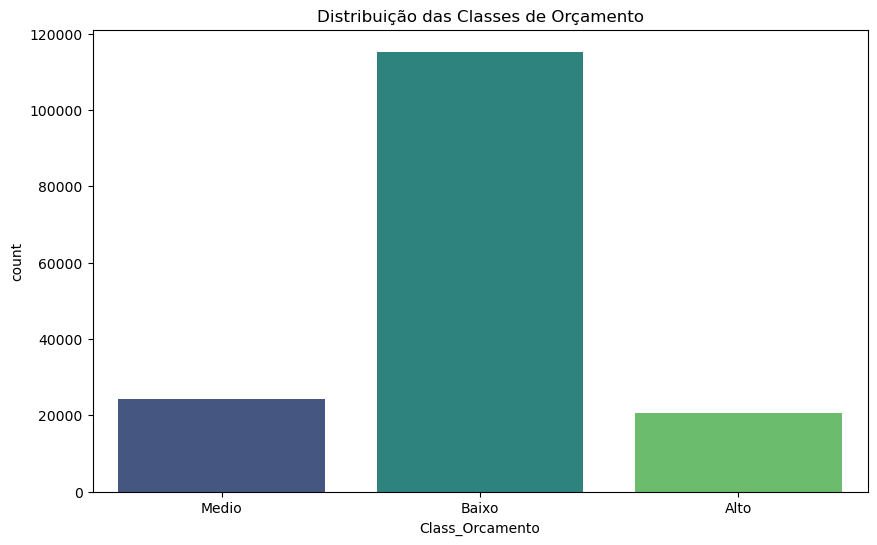

In [97]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Class_Orcamento', data=gastos_diretos, palette='viridis')
plt.title('Distribuição das Classes de Orçamento')
plt.savefig('../resultados/distribuicao_classes.png', bbox_inches='tight')
plt.show()